In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist, pdist
import matplotlib.pyplot as plt

iris = datasets.load_iris()

x = iris.data
y = iris.target


('For n_clusters =', 2, 'The average silhouette_score is :', 0.68081362027879422)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.55259194453090321)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.49782569008681471)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.48851755086545079)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.37121805035291017)


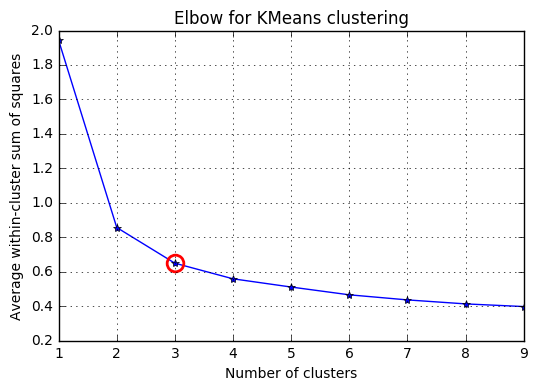

In [2]:
#Predicting K using Silhouette
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
	clusterer = KMeans(n_clusters=n_clusters, random_state=10)
	cluster_labels = clusterer.fit_predict(x)
	silhouette_avg = sm.silhouette_score(x, cluster_labels)
	print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

#Predicting K using Elbow method
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(x) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(x, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/x.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(x)**2)/x.shape[0]
bss = tss-wcss

kIdx = 2

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

plt.show()

In [3]:
# Silhouette Score is highest for 2 clusters because Silhouette score is more for better defined & separated clusters.
# And we can notice the elbow at cluster = 3. So, we try num_clusters with 2 and 3. 
# We can observe n_clusters =3 gives a better score for out dataset between n_clusters = 2 and n_clusters =3.
# So, choosing 3.

# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(x)

predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print (model.labels_)
print (predY)


# Performance Metrics
print sm.accuracy_score(y, predY)

	
# Confusion Matrix
print sm.confusion_matrix(y, predY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
0.893333333333
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


# Discussion on choice of clusters

In [ ]:
Silhouette Score is highest for 2 clusters because Silhouette score is more for better defined & separated clusters.
And we can notice the elbow at cluster = 3. So, we try num_clusters with 2 and 3. 
We can observe n_clusters =3 gives a better score for out dataset between n_clusters = 2 and n_clusters =3.
So, choosing 3.